In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [11]:
img = cv2.imread('../DATA/car_plates.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
haarcascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_russian_plate_number.xml')

In [13]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

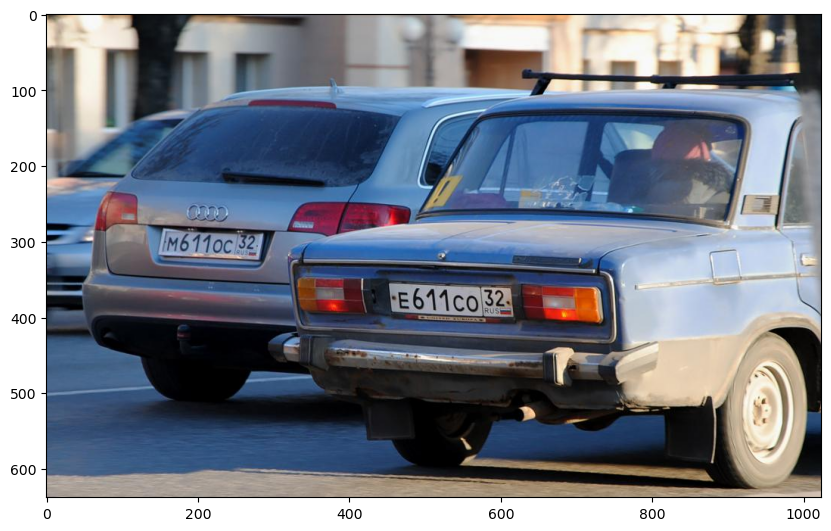

In [14]:
display(img)

In [15]:

x,w,y,h = -1,-1,-1,-1
def detect_plate(img):
    global x,w,y,h
    detect_img = img.copy()
    
    number_rects = haarcascade.detectMultiScale(detect_img)
    
    for i, number_rect in enumerate(number_rects):
        if i == len(number_rects) - 1:
            break
        x, y, w, h = number_rect
        cv2.rectangle(detect_img, (x,y), (x+w,y+h),(255,0,0),3)
    
    # for (x,y,w,h) in number_rects[:len(number_rects-2)]:
    #     cv2.rectangle(detect_img, (x,y), (x+w,y+h),(255,0,0),3)
    #     break
        
        
    return detect_img

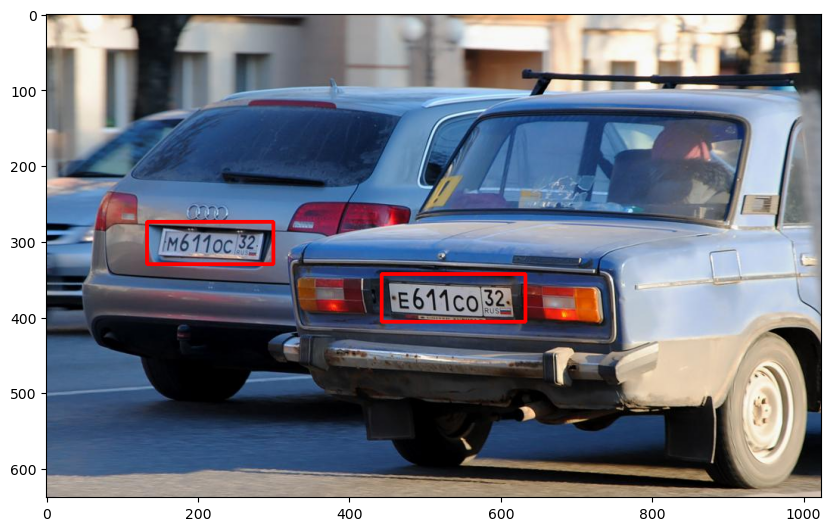

In [16]:
result = detect_plate(img)
display(result)

In [26]:
def detect_and_blur_plate(img):
    # roi = img[y:y+h,x:x+w] 
    # final = cv2.medianBlur(roi, 7)
    # l = img
    # s = final
    # l[y:y+h, x:x+w] = s
    
    detect_img = img.copy()
    l = detect_img
    number_rects = haarcascade.detectMultiScale(detect_img)
    for i, number_rect in enumerate(number_rects):
        if i == len(number_rects) - 1:
            break
        x, y, w, h = number_rect
        roi = detect_img[y:y+h,x:x+w] 
        final = cv2.medianBlur(roi, 11)
        # l = img
        s = final
        l[y:y+h, x:x+w] = s
    
    return l
    

In [27]:
result = detect_and_blur_plate(img)

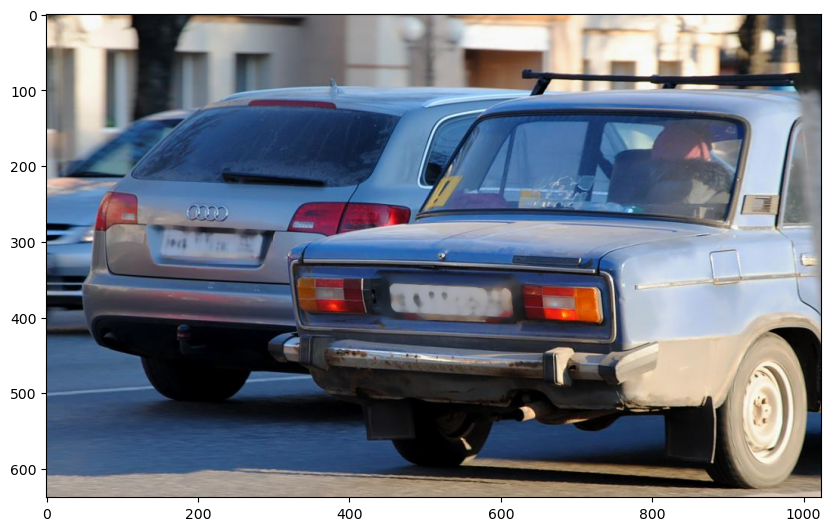

In [28]:
display(result)